In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Reading Dataset

In [32]:
data = pd.read_csv('./Student Mental health.csv')

data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [33]:
data.shape

(101, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

## Cleaning Data

First we will remove null values from dataset
- dropna() is use to drop NaN values from every rows
- notna() is use to remove NaN values from particular column

In [38]:
data = data[data['Age'].notna()]

data.shape

(100, 11)

Rename columns

In [39]:
data.columns = ['timestamp', 'gender', 'age', 'course', 'year', 'CGPA', 'marital_Status', 'depression', 'anxiety', 'panic_Attack', 'treatment']

data.head()

,timestamp,gender,age,course,year,CGPA,marital_Status,depression,anxiety,panic_Attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### changes in columns
- Age Column : Change dataType from float to int
- Year Column : Seprate word 'year' or 'Year' taking only numerical value and making dataType int
- CGPA Column : Trimming whitespace from end
- Course Column : Correct spelling of same courses


In [40]:
data['age'] = data['age'].astype(int)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       100 non-null    object
 1   gender          100 non-null    object
 2   age             100 non-null    int64 
 3   course          100 non-null    object
 4   year            100 non-null    int64 
 5   CGPA            100 non-null    object
 6   marital_Status  100 non-null    object
 7   depression      100 non-null    object
 8   anxiety         100 non-null    object
 9   panic_Attack    100 non-null    object
 10  treatment       100 non-null    object
dtypes: int64(2), object(9)
memory usage: 9.4+ KB


In [42]:
data['year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

trimming year from year column and making dataType as int

In [43]:
def removeYear(year):
    year = year[-1]
    year = int(year)
    return year

In [49]:
data['year'] = data['year'].apply(removeYear)

data.year.unique()

array([1, 2, 3, 4])

In [51]:
data.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

trimming extra whitespace from end 

In [53]:
def trimSpace(CGPA):
    CGPA = CGPA.strip()
    return CGPA

In [56]:
data['CGPA'] = data['CGPA'].apply(trimSpace)

data.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [60]:
print(data.course.unique())

len(data.course)

['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']


100

We can see that many same courses are writtern in different way, we have to change them

In [61]:
data.course.replace({'engin': 'Engineering' , 'Engine':'Engineering' , 
                    'Islamic education':'Islamic Education' ,'Pendidikan islam':'Pendidikan Islam' , 
                    'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 
                    'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 
                    'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'}, inplace=True)

data.course.nunique()

37

## Exploratory Data Analysis

### Graphs for mentalProblem vs Courses
1. Anxiety vs course
2. Depression vs course
3. PanicAttack vs course

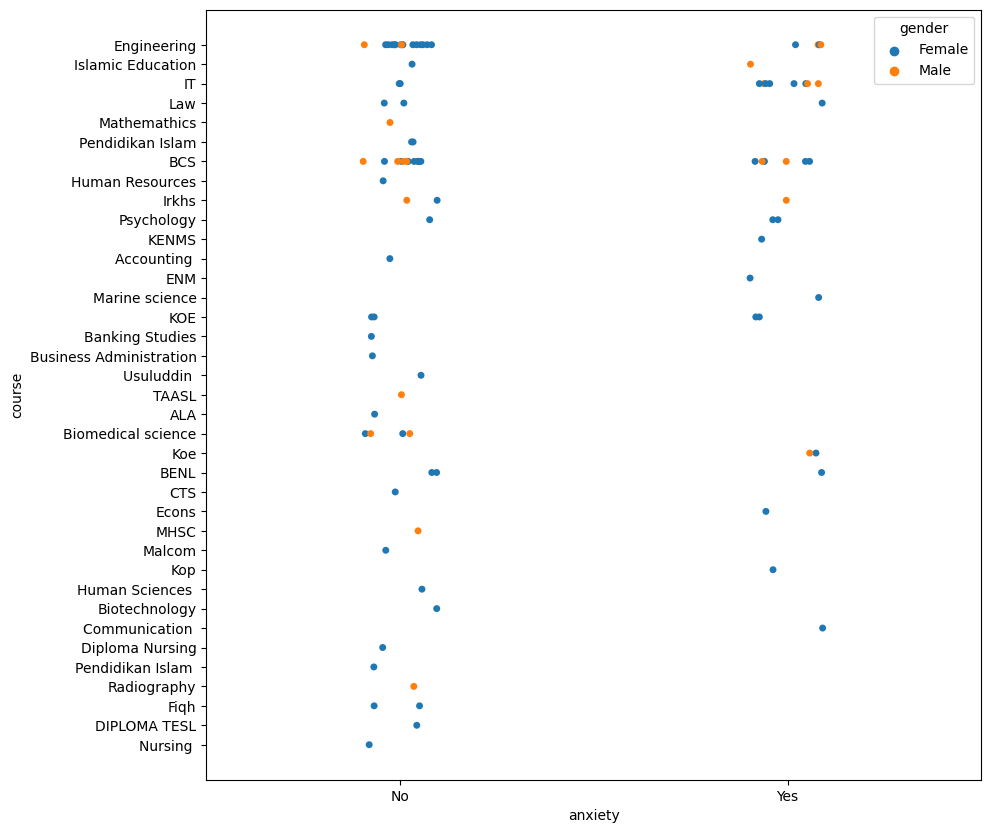

In [85]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'anxiety', y= 'course', hue= 'gender', data=data)
plt.show()



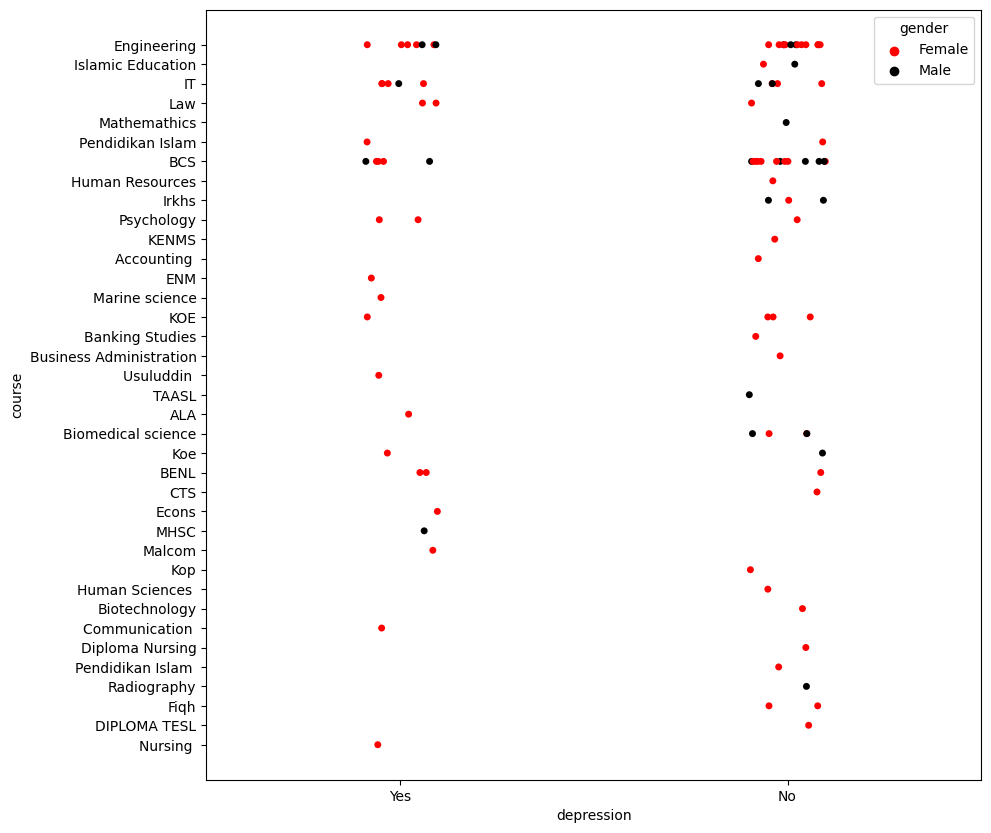

In [86]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'depression', y= 'course', hue= 'gender', data=data, palette = ['red', 'black'])
plt.show()

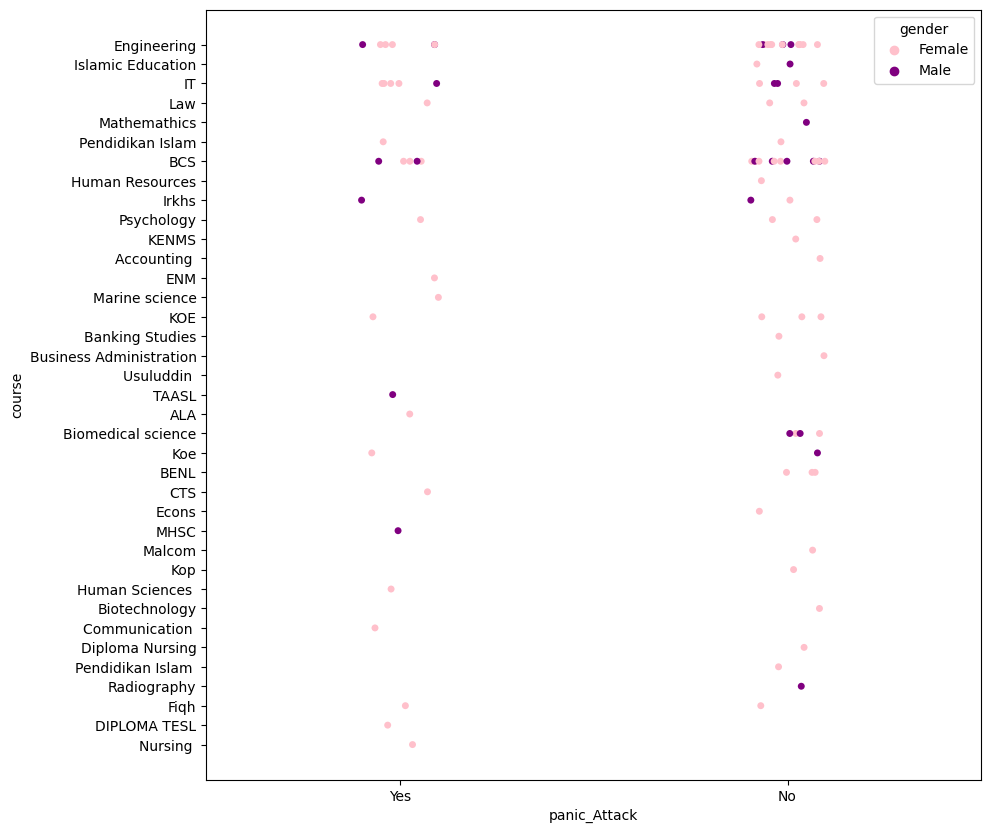

In [87]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'panic_Attack', y= 'course', hue= 'gender', data=data, palette = ['pink', 'purple'])
plt.show()

### Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.

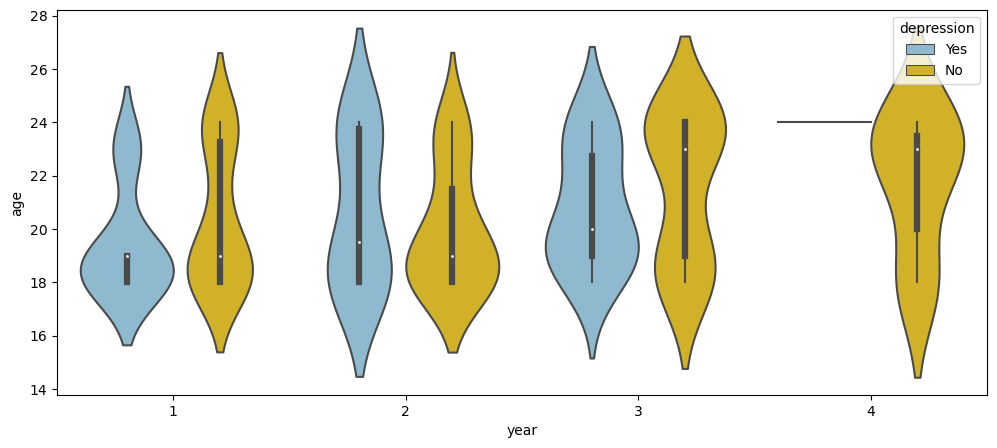

In [100]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'year', y = 'age', data = data,  hue = 'depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

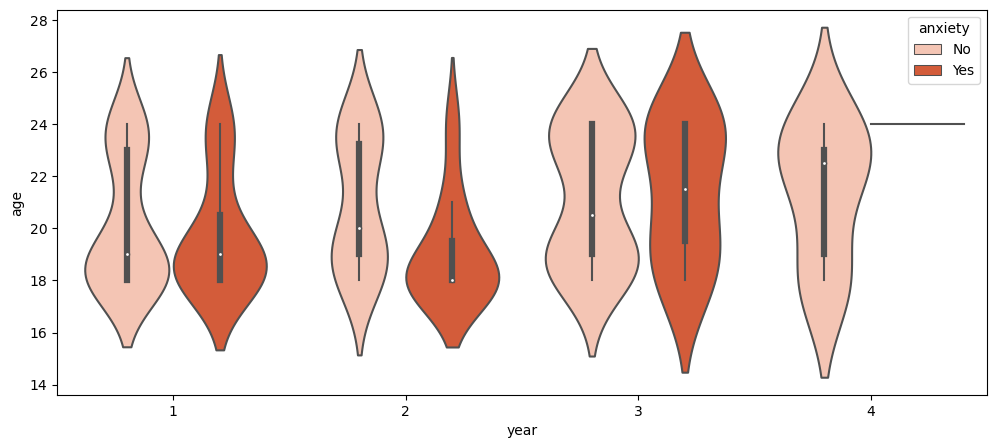

In [103]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'year', y = 'age', data = data,  hue = 'anxiety', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

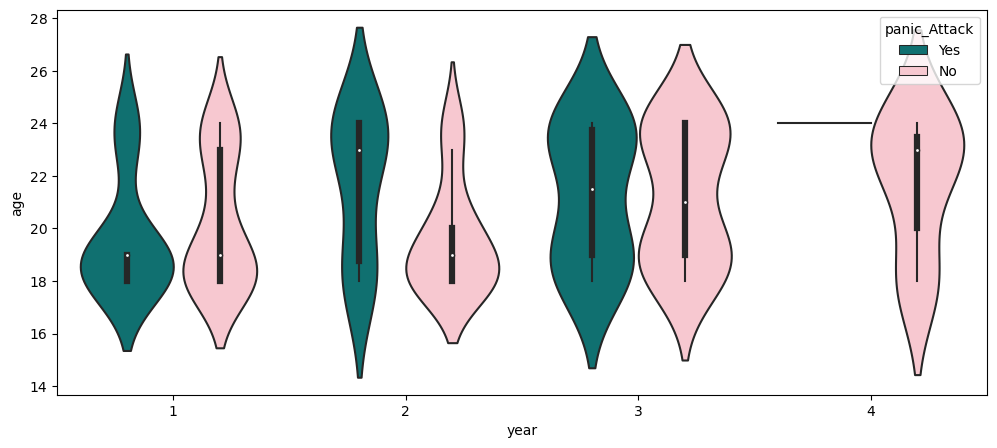

In [102]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'year', y = 'age', data = data,  hue = 'panic_Attack', palette = ['teal', 'pink'])
plt.show()

## PreProcessing Data

In [107]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [106]:
data.drop('timestamp', axis=1, inplace=True)

data

,gender,age,course,year,CGPA,marital_Status,depression,anxiety,panic_Attack,treatment
0,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [ ]:
transformer = ColumnTransformer(transformer_weights=[
    ('tnf1', OrdinalEncoder(categories=[['Male', 'Female']]),['gender'])
], remainder='passthrough')

In [111]:
encoder = LabelEncoder()

categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']

categorical_columns

['gender',
 'course',
 'CGPA',
 'marital_Status',
 'depression',
 'anxiety',
 'panic_Attack',
 'treatment']

In [113]:
for columns in categorical_columns:
    data[columns] = encoder.fit_transform(data[columns])

data.head()

,gender,age,course,year,CGPA,marital_Status,depression,anxiety,panic_Attack,treatment
0,0,18,14,1,3,0,1,0,1,0
1,1,21,20,2,3,0,0,1,0,0
2,1,19,18,1,3,0,1,1,1,0
3,0,22,25,3,3,1,1,0,0,0
4,1,23,29,4,3,0,0,0,0,0


In [118]:
X = data.iloc[:,:5]
y = data.iloc[:, 6:9]

In [121]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape

(80, 5)

In [178]:
train = np.array(X_train)
test = np.array(y_train)

## Model Building

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [167]:
model = Sequential()


model.add(Dense(16, activation='relu', input_dim= 5))
model.add(Dense(8, activation='relu'))

model.add(Dense(6, activation ='sigmoid'))

In [168]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics='accuracy')

In [169]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                96        
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 6)                 54        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [179]:
history = model.fit(X_train, y_train, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 80
  y sizes: 20
Make sure all arrays contain the same number of samples.